<a href="https://colab.research.google.com/github/Nyubk/PP/blob/main/ETL_9_ENAH_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://edu.rcastellanos.cdmx.gob.mx/sitio_lad/images/Imagotipo_compacto_color_600px.png width= 300>

#La influencia de la salud mental en la deserción escolar

##*Factores de potencialización en la deserción escolar*
### ETL al *dataset* 9_ENAH_students.csv

  Cruz, R (2023): Factores de la deserción escolar. v1.0. ENAH - Dep. Antropología Física. *dataset*. https://www.kaggle.com/competitions/etl-datasets-salud-mental/data?select=9_ENAH_students.csv

*Equipo 2*

Integrantes:

Espinosa Flores America Daniela

Rincon Ramírez Victor Francisco

###*Cuestionario para la categorización preliminar de la calidad de la salud mental en estudiantes universitarios de la Universidad Rosario Castellanos*

##*Extracción del dataset de los datos proporcionados por estudiantes de Escuela Nacional de Antropología e Historia (ENAH)*

In [1]:
#Instalar libreria externa para abrir datasets de repositorios externos
!pip install opendatasets

#Importar librerias para la manipulación y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import opendatasets as od

#Importar librerias requeridas para la red neuronal

#Importar utilidades
from os import sep
from IPython.display import clear_output
import os


In [2]:
#Acceder al repositorio de acceso
dataset_link= 'https://www.kaggle.com/competitions/etl-datasets-salud-mental/data?select=9_ENAH_students.csv'

**Credenciales de acceso al repositorio**

**Username: victorrincon8624**

**Key: b6fa98bf98d457bd7aa121acc94b86ae**

In [3]:
#Ingresar credenciales de acceso para el repositorio
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: victorrincon8624
Your Kaggle Key: ··········


100%|██████████| 62.5M/62.5M [00:00<00:00, 75.2MB/s]



Extracting archive ./etl-datasets-salud-mental/etl-datasets-salud-mental.zip to ./etl-datasets-salud-mental


In [4]:
#Extracción del dataset
import os
os.chdir('etl-datasets-salud-mental')
os.listdir()

['9_ENAH_students.csv',
 '4_student_mental_health_2',
 '5_anxiety',
 '7_detection-mental-health-depression',
 '1_StudentStressLevelDataset.csv',
 '6_mental-health-detection',
 '3_student_mental_health',
 '8_Suicide_Depression_Detection',
 '2_burning-out']

##Datasets utilizados

9_ENAH_students

In [5]:
#Visualización del Dataset sin transformar
pd.read_csv("/content/etl-datasets-salud-mental/9_ENAH_students.csv")

,Matricula,Sexo,Edad,hope,interest,apetite,sleep,inquietud_,u_rest,worth,...,drug_user,mental_disease,duracion_D,duracion_A,duracion_N,inc_N,cond_N,Semestre,Carrera,Desercion
0,120210027,M,32,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,4,A. Fisica,0
1,120210028,M,39,0,0,0,1,1,0,1,...,1,0,0,1,0,0,0,4,A. Social,0
2,120210029,M,35,0,1,0,1,0,1,1,...,1,1,0,1,1,1,1,6,Arqueologia,0
3,120210030,F,20,1,1,0,1,0,1,1,...,1,0,0,1,0,1,0,4,A. Social,1
4,120210031,F,18,1,1,0,1,0,1,0,...,0,1,0,1,1,1,0,6,Etnologia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,120210522,M,34,0,1,1,0,0,1,0,...,1,0,1,0,0,0,1,6,Historia,1
496,120210523,F,31,0,0,1,1,1,0,1,...,1,0,0,1,0,1,0,8,Lingüistica,1
497,120210524,M,34,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,8,Arqueologia,1
498,120210525,M,28,1,0,1,1,1,1,1,...,1,0,1,1,1,1,0,8,Arqueologia,1


In [6]:
#Almacenamiento del dataset en la variable df_emh (dataframe_enah_mental_health)
df_emh = pd.read_csv("/content/etl-datasets-salud-mental/9_ENAH_students.csv")
df_emh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Matricula       500 non-null    int64 
 1   Sexo            500 non-null    object
 2   Edad            500 non-null    int64 
 3   hope            500 non-null    int64 
 4   interest        500 non-null    int64 
 5   apetite         500 non-null    int64 
 6   sleep           500 non-null    int64 
 7   inquietud_      500 non-null    int64 
 8   u_rest          500 non-null    int64 
 9   worth           500 non-null    int64 
 10  i_focus         500 non-null    int64 
 11  t_death         500 non-null    int64 
 12  drug_user       500 non-null    int64 
 13  mental_disease  500 non-null    int64 
 14  duracion_D      500 non-null    int64 
 15  duracion_A      500 non-null    int64 
 16  duracion_N      500 non-null    int64 
 17  inc_N           500 non-null    int64 
 18  cond_N    

In [55]:
dfemh = df_emh.copy()

In [79]:
registro= pd.DataFrame(np.arange(11000).reshape(500, 22))
len(registro)

500

Categorizacion preliminar de depresión

In [ ]:
#Comprobacion de presencia de sintomas de depresión
symp_D = []

for i in range(len(registro)):
  symp = [dfemh.hope[i],dfemh.interest[i],dfemh.apetite[i],dfemh.sleep[i],dfemh.inquietud_[i],dfemh.u_rest[i],dfemh.worth[i],dfemh.i_focus[i],dfemh.t_death[i]]
  for i in range(len(symp)):
    symp[i] == True
    total = ++i
  if total >= 4:
    symp_D.append(1)
  else:
    symp_D.append(0)
symp_D

In [ ]:
determinantes_D=[]
for i in range(len(registro)):
  if dfemh.drug_user[i] == 0:
    if dfemh.mental_disease[i] == 0:
      determinantes_D.append(1)
    else:
      determinantes_D.append(0)
  else:
    determinantes_D.append(0)
determinantes_D

In [ ]:
duracion_D=[]
for i in range(len(registro)):
  if dfemh.duracion_D[i] == 1:
    duracion_D.append(1)
  else:
    duracion_D.append(0)
duracion_D

In [124]:
desercion =np.array(dfemh.Desercion)

In [125]:
desercion

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [159]:
duracion_T=np.array(duracion_D)
duracion_T
len(np.transpose(duracion_T))

500

In [154]:
depression=[]

In [161]:
for i in range(len(np.transpose(duracion_T))):
  if duracion_D[i]==1:
    if determinantes_D[i]==1:
      if symp_D[i]==1:
        depression.append(1)
  else:
    depression.append(0)

In [ ]:
depression

Categorizacion preliminar de ansiedad

In [ ]:
#Comprobación del tiempo requerido
duracion_A=[]
for i in range(len(registro)):
  if dfemh.duracion_A[i] == 1:
    duracion_A.append(1)
  else:
    duracion_A.append(0)
duracion_A

In [ ]:
#Comprobacion de presencia de sintomas de ansiedad
symp_A = []

for i in range(len(registro)):
  symp = [dfemh.hope[i],dfemh.interest[i],dfemh.apetite[i],dfemh.sleep[i],dfemh.inquietud_[i],dfemh.u_rest[i],dfemh.worth[i],dfemh.i_focus[i],dfemh.t_death[i]]
  for i in range(len(symp)):
    symp[i] == True
    total = ++i
  if total >= 4:
    symp_A.append(1)
  else:
    symp_A.append(0)
symp_A

Categorizacion preliminar de estres crónico *(burnout)*

In [ ]:
#Comprobación del tiempo requerido
duracion_N=[]
for i in range(len(registro)):
  if dfemh.duracion_N[i] == 1:
    duracion_N.append(1)
  else:
    duracion_N.append(0)
duracion_N

In [ ]:
#Comprobacion de presencia de sintomas de estres crónico
symp_N = []

for i in range(len(registro)):
  symp = [dfemh.hope[i],dfemh.interest[i],dfemh.apetite[i],dfemh.sleep[i],dfemh.inquietud_[i],dfemh.u_rest[i],dfemh.worth[i],dfemh.i_focus[i],dfemh.t_death[i]]
  for i in range(len(symp)):
    symp[i] == True
    total = ++i
  if total >= 4:
    symp_N.append(1)
  else:
    symp_N.append(0)
symp_N

In [ ]:
#Categorización de los datos en base a CIE-10

for i in range
#Depresión
duracion_D #Debe persistir por al menos 2 semanas como indica CIE-10 (F33) Pág 119
determinantes_D #No debe tener ninguna de las causas excluyentes CIE-10 (F33)
symp_D #Debe presentar al menos 4 sintomas de la lista para considerarse CIE-10 (F33)

#Ansiedad
duracion_A #Debe persistir por al menos 6 meses como indica CIE-10 (F41.1) Pág 133
symp_A #Debe presentar al menos 4 sintomas de la lista para considerarse CIE-10 (F41.1)


#Neurastenia
cond_N #Debe presentar alguno de las condiciones especificadas en CIE-10 (F48 A)
symp_N #Debe presentar al menos 4 sintomas de la lista para considerarse CIE-10 (F48 B) Pag 155
inc_N #Debe presentar incapacidad para recuperarse de los escenarios descritos en CIE-10 (F48 A)
duracion_N #Debe persistir por al menos 3 meses




Época 100, Loss function (MSE): 0.49854491454039551179
Época 200, Loss function (MSE): 0.49850958299066677748
Época 300, Loss function (MSE): 0.49847260545033095225
Época 400, Loss function (MSE): 0.49843386737088501981
Época 500, Loss function (MSE): 0.49839324350140251640
Época 600, Loss function (MSE): 0.49835059662361846922
Época 700, Loss function (MSE): 0.49830577610493731466
Época 800, Loss function (MSE): 0.49825861623827483182
Época 900, Loss function (MSE): 0.49820893433146029583
Época 1000, Loss function (MSE): 0.49815652850134317653
Época 1100, Loss function (MSE): 0.49810117511838603033
Época 1200, Loss function (MSE): 0.49804262583592456837
Época 1300, Loss function (MSE): 0.49798060412382560980
Época 1400, Loss function (MSE): 0.49791480120817233068
Época 1500, Loss function (MSE): 0.49784487129581667109
Época 1600, Loss function (MSE): 0.49777042593377107682
Época 1700, Loss function (MSE): 0.49769522401167459735
Época 1800, Loss function (MSE): 0.49761642928475569025
É

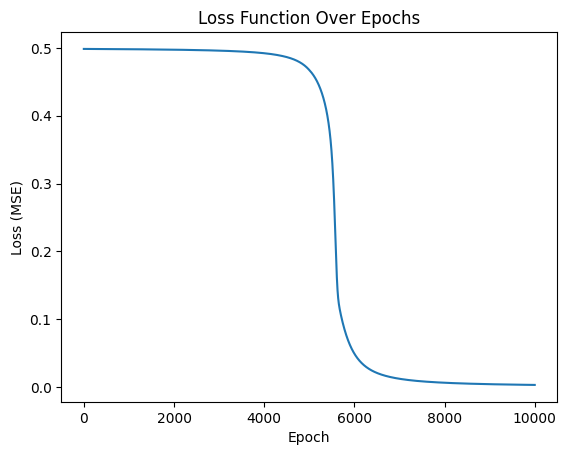

In [ ]:
# Datos de entrada y salida
X = np.array([[1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 0, 1], [0, 0, 0]])
Y = np.array([[1], [0], [1], [0], [1], [0], [1], [0]])

# Definir la arquitectura de la red neuronal
np.random.seed(int(np.sqrt(2**31)))
input_neurons = 3
hidden_neurons = 18
output_neurons = 1

# Inicialización de pesos
weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))

# Inicialización de sesgos
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Función de activación ReLU
def relu(x):
    return np.maximum(0, x)

# Derivada de la función ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Función de activación Sigmoid (para la capa de salida)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Inicialización de variables
epochs = 10000
learning_rate = 0.003

# Lista para almacenar los valores de la función de pérdida (MSE)
loss_values = []

# Entrenamiento de la red neuronal
for epoch in range(epochs):
    # Paso hacia adelante (Forward pass)
    input_layer = X

    hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    # Cálculo del error
    error = Y - output
    mse = np.mean((error)**2)
    loss_values.append(mse)  # Almacenar el valor de la pérdida

    # Mostrar el progreso
    if (epoch+1) % 100 == 0:
        _mse = '{:.20f}'.format(mse)
        print(f'Época {epoch+1}, Loss function (MSE): {_mse}')

    # Retropropagación (Backpropagation)
    d_output = error * sigmoid_derivative(output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * relu_derivative(hidden_layer_output)

    # Actualización de pesos
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += input_layer.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Paso hacia adelante final para obtener las predicciones
input_layer = X
hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
hidden_layer_output = relu(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predictions = sigmoid(output_layer_input)

print("Resultados finales:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Target: {Y[i]}, Predictions {predictions[i]}")

# Graficar la función de pérdida
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Function Over Epochs')
plt.show()

# Función para predecir la salida para una nueva entrada
def predict(X_new):
    hidden_layer_input = np.dot(X_new, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predictions = sigmoid(output_layer_input)
    return predictions